In [ ]:
#Worked with Sam Falk and QY Goh

### Define Hypothesis

IDEA: more people bike on sundays than saturdays

Null hypothesis: average trips per sunday is less than average trips per saturday in january. 

Alternative hypothesis:  average trips per sunday is more than or equal to than average trips per saturday in january. 

p = .05

#### Equation
_$H_0$ : $\frac{sat_{\mathrm{tripquantity}}}{sat_{\mathrm{totalsaturdays}}} => \frac{sun_{\mathrm{tripquantity}}}{sun_{\mathrm{totalsaturdays}}}$

_$H_1$ : $\frac{sat_{\mathrm{tripquantity}}}{sat_{\mathrm{totalsaturdays}}} < \frac{sun_{\mathrm{tripquantity}}}{sun_{\mathrm{totalsaturdays}}}$

In [56]:
from __future__  import print_function, division
import matplotlib as plt
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# setting environmental variable
# uses the os lib
if os.getenv ("PUIDATA") is None:
    print ("Must set env variable PUI2018")
print(os.getenv("PUIDATA"))

/nfshome/yg833/PUIdata


In [3]:
#from homework 4 citibikes example-- adapted from to adjust for environment variables

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
# get the citibikes data for the months of Feb, May, August, and October
months = ['201602','201605','201608', '201611']
for x in months: 
   getCitiBikeCSV(x)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [5]:
cbdf = {}

for x in months:
   cbdf[x] = pd.read_csv("%s/%s-citibike-tripdata.csv" % (os.getenv("PUIDATA"), x))

In [6]:
for key, value in cbdf.items():
   print (key)
   print (value.columns)
cbdf['201611'].columns = cbdf['201602'].columns

201602
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201608
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201605
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object'

In [7]:
citidf = pd.concat(cbdf.values())

In [8]:
citidf.reset_index(drop=True, inplace=True)

In [9]:
citidf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [19]:
len(citidf)

4527759

In [10]:
# check for the column names
citidf.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [11]:
# create a date variable that is formatted into pandas format %Y-%m-%d hh:mm:ss
citidf['date'] = pd.to_datetime(citidf['starttime'])

# find the week day number 0 for Monday - 6 for Sunday
citidf['weekdaynum'] = citidf['date'].apply(lambda x: x.weekday())

In [12]:
citidf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekdaynum
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1,2016-02-01 00:00:08,0
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1,2016-02-01 00:00:56,0
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1,2016-02-01 00:01:00,0
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2,2016-02-01 00:01:00,0
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1,2016-02-01 00:01:41,0


In [13]:
# using a dictionary to map week num to week day name
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

citidf['weekday'] = citidf['weekdaynum'].apply(lambda x : days[x] )

In [17]:
citidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4527759 entries, 0 to 4527758
Data columns (total 18 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
date                       datetime64[ns]
weekdaynum                 int64
weekday                    object
dtypes: datetime64[ns](1), float64(5), int64(6), object(6)
memory usage: 621.8+ MB


In [14]:
# inspect for the counts per weekday
citidf['weekday'].value_counts()

Mon      745881
Tues     743783
Weds     741919
Thurs    674636
Fri      605214
Sat      526146
Sun      490180
Name: weekday, dtype: int64

In [20]:
citidf.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,weekdaynum
count,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.010622e+06,4.527759e+06,4.527759e+06
mean,9.599626e+02,1.060971e+03,4.073798e+01,-7.398613e+01,1.044602e+03,4.073720e+01,-7.398556e+01,2.103537e+04,1.977745e+03,1.097628e+00,2.704251e+00
std,8.656379e+03,1.180844e+03,2.434534e-02,1.633715e-02,1.170762e+03,1.348342e-01,2.414511e-01,3.561853e+03,1.168295e+01,5.671039e-01,1.946518e+00
min,6.100000e+01,7.200000e+01,4.064668e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.406419e+01,1.452900e+04,1.885000e+03,0.000000e+00,0.000000e+00
25%,3.810000e+02,3.400000e+02,4.072110e+01,-7.399725e+01,3.360000e+02,4.072083e+01,-7.399790e+01,1.793400e+04,NaN,1.000000e+00,1.000000e+00
50%,6.310000e+02,4.650000e+02,4.073913e+01,-7.398802e+01,4.620000e+02,4.073902e+01,-7.398848e+01,2.139200e+04,NaN,1.000000e+00,3.000000e+00
75%,1.074000e+03,2.003000e+03,4.075510e+01,-7.397711e+01,5.460000e+02,4.075467e+01,-7.397722e+01,2.394700e+04,NaN,1.000000e+00,4.000000e+00
max,4.319753e+06,3.440000e+03,4.080421e+01,-7.392989e+01,3.440000e+03,4.080421e+01,0.000000e+00,2.734200e+04,2.000000e+03,2.000000e+00,6.000000e+00


In [22]:
#create new column with date only
citidf['date_only'] = citidf['date'].apply(lambda x: x.date())

In [23]:
#confirm all dates present
citidf['date_only'].unique()

array([datetime.date(2016, 2, 1), datetime.date(2016, 2, 2),
       datetime.date(2016, 2, 3), datetime.date(2016, 2, 4),
       datetime.date(2016, 2, 5), datetime.date(2016, 2, 6),
       datetime.date(2016, 2, 7), datetime.date(2016, 2, 8),
       datetime.date(2016, 2, 9), datetime.date(2016, 2, 10),
       datetime.date(2016, 2, 11), datetime.date(2016, 2, 12),
       datetime.date(2016, 2, 13), datetime.date(2016, 2, 14),
       datetime.date(2016, 2, 15), datetime.date(2016, 2, 16),
       datetime.date(2016, 2, 17), datetime.date(2016, 2, 18),
       datetime.date(2016, 2, 19), datetime.date(2016, 2, 20),
       datetime.date(2016, 2, 21), datetime.date(2016, 2, 22),
       datetime.date(2016, 2, 23), datetime.date(2016, 2, 24),
       datetime.date(2016, 2, 25), datetime.date(2016, 2, 26),
       datetime.date(2016, 2, 27), datetime.date(2016, 2, 28),
       datetime.date(2016, 2, 29), datetime.date(2016, 8, 1),
       datetime.date(2016, 8, 2), datetime.date(2016, 8, 3),
    

In [24]:
#checkout the size of each date and within each weekday
pd.DataFrame(citidf[['weekday', 'date_only']].groupby(['weekday', 'date_only']).size())

0
weekday date_only        
Fri     2016-02-05  13670
        2016-02-12  16449
        2016-02-19  21959
        2016-02-26  22573
        2016-05-06  18860
        2016-05-13  32391
        2016-05-20  52543
        2016-05-27  46937
        2016-08-05  53297
        2016-08-12  44750
        2016-08-19  51669
        2016-08-26  52037
        2016-11-04  57877
        2016-11-11  45832
        2016-11-18  53390
        2016-11-25  20980
Mon     2016-02-01  24334
        2016-02-08  19026
        2016-02-15   5884
        2016-02-22  28233
        2016-02-29  27954
        2016-05-02  38537
        2016-05-09  45724
        2016-05-16  42787
        2016-05-23  48578
        2016-05-30  32619
        2016-08-01  49401
        2016-08-08  52262
        2016-08-15  49063
        2016-08-22  54404
...                   ...
Tues    2016-05-24  34796
        2016-05-31  49756
        2016-08-02  56764
        2016-08-09  56112
        2016-08-16  50426
        2016-08-23  58674
        2016-08-30  57405
        2016-11-01  55967
        2016-11-08  56603
        2016-11-15  22896
        2016-11-22  36749
        2016-11-29  14588
Weds    2016-02-03  16203
        2016-02-10  22420
        2016-02-17  23572
        2016-02-24   9761
        2016-05-04  31619
        2016-05-11  51181
        2016-05-18  44803
        2016-05-25  53439
        2016-08-03  57003
        2016-08-10  50114
        2016-08-17  53989
        2016-08-24  58154
        2016-08-31  57214
        2016-11-02  62144
        2016-11-09  38060
        2016-11-16  53342
        2016-11-23  34466
        2016-11-30  24435

[121 rows x 1 columns]

In [21]:
#make into a new dataframe to graph all days

In [27]:
graphunredacted = pd.DataFrame(citidf.groupby(['weekday', 'date_only']).size()).reset_index()
graphunredacted.columns = ['weekday', 'date_only', 'count']

Text(0,0.5,'Trips')

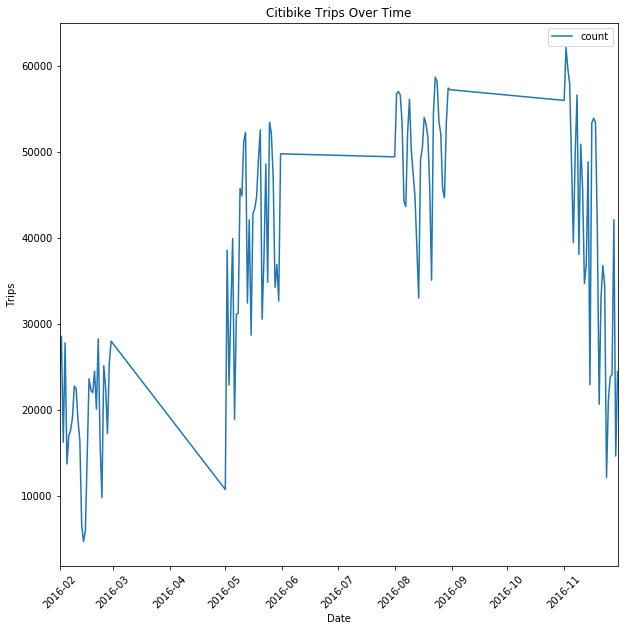

In [28]:
#graph count of all days
graphunredacted.plot.line(x= 'date_only', y ='count' ,rot = 45, figsize = (10,10))
plt.title('Citibike Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Trips')

figure 1: The graph of total trips for each day in June 2016. 6/5/2016 seems to show an unsual dip for this sample

In [46]:
graphdates = graphunredacted.set_index('date_only')
graphdates.head()

,weekday,count
date_only,,
2016-02-05,Fri,13670
2016-02-12,Fri,16449
2016-02-19,Fri,21959
2016-02-26,Fri,22573
2016-05-06,Fri,18860


In [60]:
plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, len(graphdates['weekday'].unique())))

for x in graphdates['weekday'].unique():
    graphweekday = graphdates[graphdates['weekday'] == x]

In [58]:
plt.scatter(graphweekday.index, y=graphweekday['count'], color=colors[x])
plt.legend(graphdates['weekday'].unique())
plt.title('Scatter Plot Weekday by Count')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [29]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekdaynum,weekday,date_only
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1,2016-02-01 00:00:08,0,Mon,2016-02-01
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1,2016-02-01 00:00:56,0,Mon,2016-02-01
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1,2016-02-01 00:01:00,0,Mon,2016-02-01
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2,2016-02-01 00:01:00,0,Mon,2016-02-01
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1,2016-02-01 00:01:41,0,Mon,2016-02-01


In [31]:
#create a working dataframe for specific to begin testing hypothesis
wcitidf = citidf[['weekdaynum', 'date_only']]

In [32]:
wcitidf = wcitidf[wcitidf['weekdaynum'] > 4]

In [33]:
wcitidf.head()

,weekdaynum,date_only
110501,5,2016-02-06
110502,5,2016-02-06
110503,5,2016-02-06
110504,5,2016-02-06
110505,5,2016-02-06


In [34]:
# confirm the changes
wcitidf['weekdaynum'].value_counts()

5    526146
6    490180
Name: weekdaynum, dtype: int64

In [35]:
#create a new dataframe that will graph the counts of each day for sat and sunday
tographdays = pd.DataFrame(wcitidf.groupby([ 'date_only', 'weekdaynum']).size()).reset_index()

In [36]:
tographdays.head()

,date_only,weekdaynum,0
0,2016-02-06,5,16933
1,2016-02-07,6,17605
2,2016-02-13,5,6625
3,2016-02-14,6,4653
4,2016-02-20,5,24484


In [37]:
tographdays

,date_only,weekdaynum,0
0,2016-02-06,5,16933
1,2016-02-07,6,17605
2,2016-02-13,5,6625
3,2016-02-14,6,4653
4,2016-02-20,5,24484
5,2016-02-21,6,20052
6,2016-02-27,5,17226
7,2016-02-28,6,25437
8,2016-05-01,6,10697
9,2016-05-07,5,31078


In [38]:
tographdays.columns

Index(['date_only', 'weekdaynum', 0], dtype='object')

In [39]:
#rename columns
tographdays.columns = ['date_only', 'weekdaynum', 'count']

In [41]:
##https://python-graph-gallery.com/11-grouped-barplot/
#used this documentation to graph

#create two subsets of data (sat and sun)
sat = tographdays[tographdays['weekdaynum'] == 5]['count']
sun = tographdays[tographdays['weekdaynum'] == 6]['count']

#set specific widths so bars line up
barWidth = 0.25
satwidth = np.arange(len(sat))
sunwidth = [x + barWidth for x in satwidth]



ValueError: shape mismatch: objects cannot be broadcast to a single shape

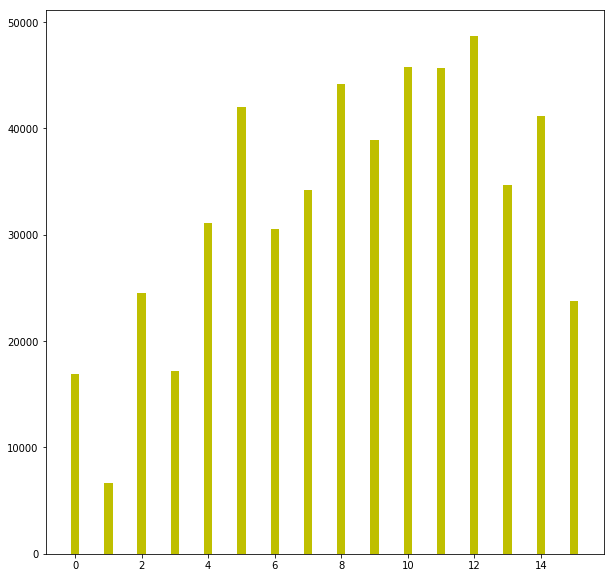

In [43]:
#plot figure
plt.figure(figsize=(10,10))


plt.bar(satwidth, sat, color='y', width=barWidth, label='sat')
plt.bar(sunwidth, sun, color='b', width=barWidth, label='sun')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sat))], ['week1', 'week2', 'week3', 'week4', 'week5'])

plt.title('Citibike Trips for Every Weekend in June')
plt.ylabel('Total Citibike Trips')

plt.xlabel('Week')


plt.legend()
plt.show()


figure 2: This shows the count of citibike trips for each week and compares saturday to sunday amounts. Though not a true test, this graph does yield me to believe the null hypothesis will be able to be rejected


In [36]:
#further manipulation to compare average daily trips for saturdays and sundays in june
avgdaydf = pd.DataFrame(tographdays.groupby(['weekday'])['count'].mean()).reset_index()

In [37]:
avgdaydf.head()

,weekday,count
0,5,43477
1,6,37824


In [38]:
#make it easier to read
avgdaydf.replace(5, 'saturday', inplace=True)

In [39]:
avgdaydf.replace(6, 'sunday', inplace= True)

In [40]:
avgdaydf

,weekday,count
0,saturday,43477
1,sunday,37824


Text(0.5,1,'Average Citibike Trips for Saturday and Sunday in June')

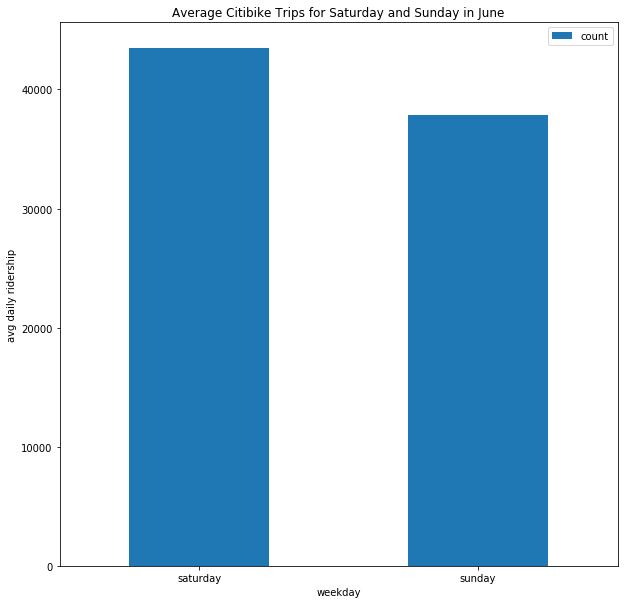

In [41]:
#plot the two numbers
avgdaydf.plot.bar(x= 'weekday', y ='count' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday in June')



Figure 3: this data shows that for Saturdays in June, there were more trips on average than sundays in june. Though more data might have a different result as it would comply with the central limit theorum, this sample, does not have the ability to reject the null. 